## Dragon Real Estate -Price Predictor 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRETIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


 1. CRIM      per capita crime rate by town

    2. ZN        proportion of residential land zoned for lots over 

                 25,000 sq.ft.

    3. INDUS     proportion of non-retail business acres per town

    4. CHAS      Charles River dummy variable (= 1 if tract bounds 

                 river; 0 otherwise)

    5. NOX       nitric oxides concentration (parts per 10 million)

    6. RM        average number of rooms per dwelling

    7. AGE       proportion of owner-occupied units built prior to 1940

    8. DIS       weighted distances to five Boston employment centres

    9. RAD       index of accessibility to radial highways

    10. TAX      full-value property-tax rate per $10,000

    11. PTRATIO  pupil-teacher ratio by town

    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

                 by town

    13. LSTAT    % lower status of the population

    14. MEDV     Median value of owner-occupied homes in $1000's



In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        501 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PIRETIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRETIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,501.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555462,6.288633,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.116089,0.704590,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A970D12E48>,
      dtype=object)

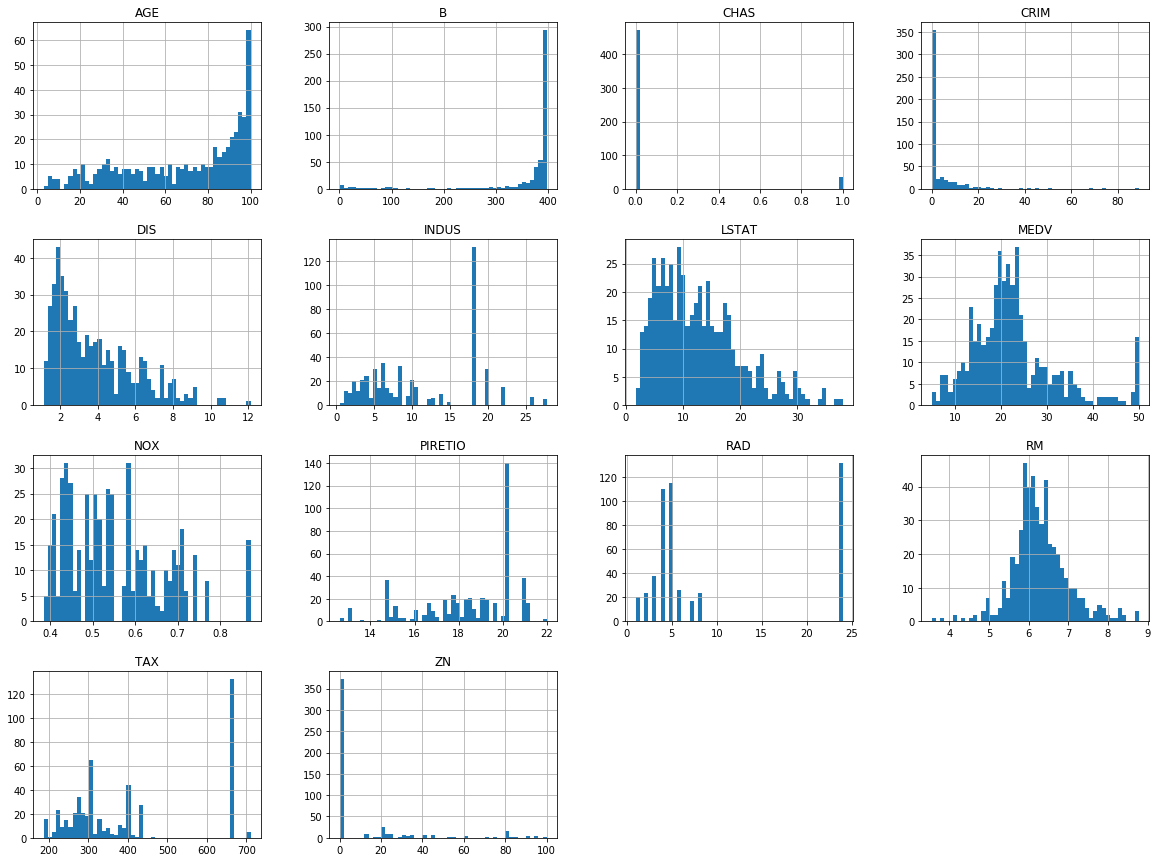

In [9]:
housing.hist(bins=50 ,figsize=(20,15))

## Train-Test Splitting

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    #print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set , test_set = split_train_test(housing,0.2)

In [12]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



In [15]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
CRIM       102 non-null float64
ZN         102 non-null float64
INDUS      102 non-null float64
CHAS       102 non-null int64
NOX        101 non-null float64
RM         101 non-null float64
AGE        102 non-null float64
DIS        102 non-null float64
RAD        102 non-null int64
TAX        102 non-null int64
PIRETIO    102 non-null float64
B          102 non-null float64
LSTAT      102 non-null float64
MEDV       102 non-null float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
95/7

13.571428571428571

In [19]:
376/28

13.428571428571429

In [20]:
housing= strat_train_set.copy()

## Looking for Correlation

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679682
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.423168
TAX       -0.456657
INDUS     -0.473516
PIRETIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A97BF5F908>,
      dtype=object)

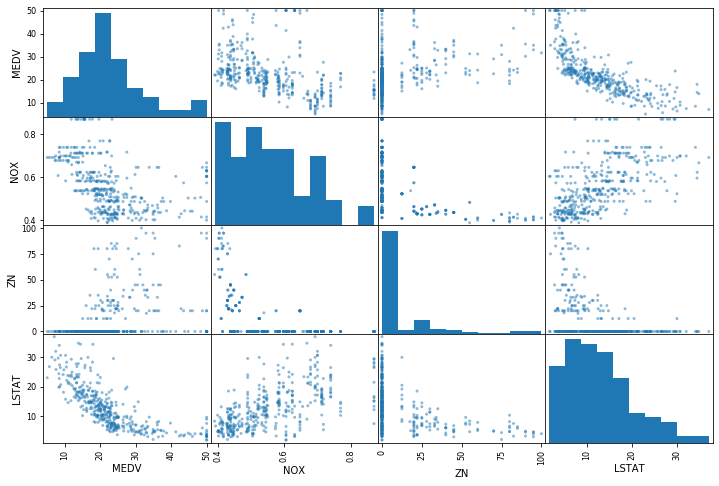

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","NOX","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

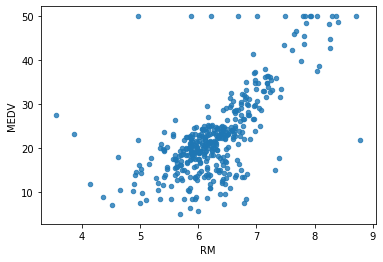

In [24]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Attribute Combination

In [25]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRETIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679682
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.423168
TAX       -0.456657
INDUS     -0.473516
PIRETIO   -0.493534
TAXRM     -0.528190
LSTAT     -0.740494
Name: MEDV, dtype: float64

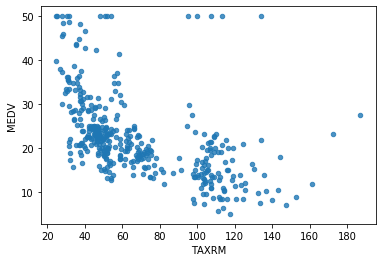

In [28]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [29]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [30]:
#1. get rid of the missing data point
#2. get ridof the whole attribute
#3. set the value to same value(0,mean or median)

In [31]:
a = housing.dropna(subset=["RM"]) #1
a.shape

(400, 13)

In [32]:
housing.drop("RM",axis=1).shape #2

(404, 12)

In [33]:
median = housing["RM"].median() #3

In [34]:
median

6.2135

In [35]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRETIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,400.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558794,6.283162,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.117104,0.715501,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [39]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [40]:
imputer.statistics_.shape

(13,)

In [41]:
x = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRETIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558588,6.282473,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116539,0.711975,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

1.Estimator
2.Transformers
3.Predictors

## Feature Scaling

1. Min-max scaling
(value-min)/(max-min)
sklearn ---> class "MinMaxScaler"

2. Standardization
(value-mean)/std
sklearn --> class "StandardScaler"


## creating a Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler())
])


In [56]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [57]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [58]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model =DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

c:\users\this pc\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [130]:
some_data = housing.iloc[:5]

In [131]:
some_labels = housing_labels.iloc[:5]

In [132]:
prepared_data = my_pipeline.transform(some_data)

In [133]:
model.predict(prepared_data)

array([22.62, 25.95, 15.77, 23.37, 23.14])

In [134]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [135]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_prediction)
rmse = np.sqrt(mse)

In [136]:
rmse

1.3912271988470757

## Using better evalution technique - Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels ,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [138]:
rmse_scores

array([3.10829221, 2.87144011, 4.44718546, 2.61946327, 3.33841504,
       2.88831093, 5.24823137, 3.48340243, 3.30359615, 3.74859574])

In [139]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [140]:
print_scores(rmse_scores)

Scores: [3.10829221 2.87144011 4.44718546 2.61946327 3.33841504 2.88831093
 5.24823137 3.48340243 3.30359615 3.74859574]
Mean: 3.505693270292839
Standard deviation: 0.7601275924597269


   MODEL OUTPUTS

Linear Regression:

Mean: 5.053448050085532
Standard deviation: 1.0621048237534212


Decision Tree:

Mean: 4.2516485663786865
Standard deviation: 0.7839613789083054


Random Forest Regression:

Mean: 3.505693270292839
Standard deviation: 0.7601275924597269



## saving the model

In [142]:
from joblib import dump, load
dump(model , 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data 

In [147]:
X_test = strat_test_set.drop("MEDV", axis =1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.09 11.86 25.28 22.5  20.53 15.18 22.24 14.09 29.89 39.43 19.49 12.29
 23.73 30.15 19.64 10.43 31.71 15.75 23.77 19.59 20.05 17.52 12.86 21.65
 17.31 30.17 16.13 33.01  7.64 31.81 23.96 20.8  23.47  9.97 20.37 10.97
 40.42 24.02 24.25 41.26 23.75 28.59 21.64 21.32 19.28 33.85 44.6  20.18
 21.85 23.   21.83 15.1  21.16 15.35 24.15 33.41 45.18 28.31 18.95 20.01
 46.99 10.96 19.92 25.26 13.69 32.44 18.75 17.55 18.79 33.56 28.42 22.89
 21.71 22.05 34.92 12.69 15.76 19.09 20.23 21.71 22.31 21.04 15.01 23.3
 22.07 21.15 12.86 21.39 22.24 23.02 17.16 27.68  7.08 26.86 18.52 29.89
 19.33 31.85 14.29 25.59 20.96 21.78] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36

In [146]:
final_rmse

2.9807669430244714

In [149]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.43123115,
       -0.24535862, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])